#                                                     PARKINSONS DISEASE PREDICTION

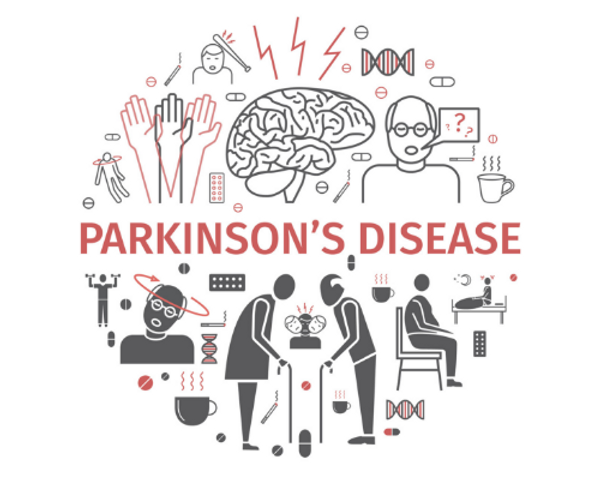

# DATA DESCRIPTION

name : This column denotes ASCII subject name and recording number of the person

MDVP:Fo(Hz) : This column denotes average vocal fundamental frequency of the person

MDVP:Fhi(Hz) : Denotes Maximum vocal fundamental frequency of the person

MDVP:Flo(Hz) : Denotes Minimum vocal fundamental frequency of the person

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP : Indicates several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA :  Represents various measures of variation in amplitude

NHR,HNR : These columns indicates two measures of ratio of noise to tonal components in the voice 

status : Health status of the person, if it shows 1 the person is affected and if it shows 0 the person is healthier.

RPDE,D2 : These are the two nonlinear dynamical complexity measures

DFA : This indicates Signal fractal scaling exponent

spread1,spread2,PPE : These are three nonlinear measures of fundamental frequency variation



These are the description about the columns of the dataset.



# Importing Google Colab from Drive

In [12]:
from google.colab import drive

# Mounting into Google Drive

In [13]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Importing Python Libraries

In [14]:
import numpy as np                   #for handling arrays
import pandas as pd                  #for handling dataframes
import matplotlib.pyplot as plt      #for visualization
import seaborn as sns                #for visualisation
import warnings                      #for removing warnings
warnings.filterwarnings("ignore")

##  Reading the CSV file

In [15]:
file=pd.read_csv("/content/drive/MyDrive/Parkinson Disease.csv")

# Preprocessing Steps

In [16]:
file

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


# Finding  basic information about the given data

In [17]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

# Finding the Number of Columns

In [18]:
file.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

# Finding the Descriptive Statistical summary of the given data

In [19]:
file.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# Showing the top 10 rows of the Dataframe

In [20]:
file.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


# Showing last 15 rows of the Dataframe

In [21]:
file.tail(15)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
180,phon_R01_S44_4,150.440,163.441,144.736,0.00396,0.00003,0.00206,0.00233,0.00619,0.02551,...,0.03964,0.00611,23.133,1,0.352396,0.759320,-6.261446,0.183218,2.264226,0.144105
181,phon_R01_S44_5,148.462,161.078,141.998,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,...,0.02849,0.00639,22.866,1,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710
182,phon_R01_S44_6,149.818,163.417,144.786,0.00336,0.00002,0.00174,0.00198,0.00521,0.02145,...,0.03464,0.00595,23.008,1,0.329577,0.757180,-6.277170,0.109397,2.209021,0.156368
183,phon_R01_S49_1,117.226,123.925,106.656,0.00417,0.00004,0.00186,0.00270,0.00558,0.01909,...,0.02592,0.00955,23.079,0,0.603515,0.669565,-5.619070,0.191576,2.027228,0.215724
184,phon_R01_S49_2,116.848,217.552,99.503,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,...,0.02429,0.01179,22.085,0,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
185,phon_R01_S49_3,116.286,177.291,96.983,0.00314,0.00003,0.00134,0.00192,0.00403,0.01564,...,0.02001,0.00737,24.199,0,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
186,phon_R01_S49_4,116.556,592.030,86.228,0.00496,0.00004,0.00254,0.00263,0.00762,0.01660,...,0.02460,0.01397,23.958,0,0.566424,0.667654,-6.431119,0.153310,2.161936,0.120605
187,phon_R01_S49_5,116.342,581.289,94.246,0.00267,0.00002,0.00115,0.00148,0.00345,0.01300,...,0.01892,0.00680,25.023,0,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868
188,phon_R01_S49_6,114.563,119.167,86.647,0.00327,0.00003,0.00146,0.00184,0.00439,0.01185,...,0.01672,0.00703,24.775,0,0.555303,0.659132,-6.710219,0.149694,1.913990,0.121777
189,phon_R01_S50_1,201.774,262.707,78.228,0.00694,0.00003,0.00412,0.00396,0.01235,0.02574,...,0.04363,0.04441,19.368,0,0.508479,0.683761,-6.934474,0.159890,2.316346,0.112838


# Checking Null Values

In [22]:
file.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

Here in the given data , there is no null values.

# Checking for the Duplicates

In [23]:
file.duplicated().sum()

0

The given dataset contains no Duplicate Values.

# Checking the Shape

In [24]:
file.shape

(195, 24)

# Checking the Datatype

In [25]:
file.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

# Returning the series containing  the count of unique values

In [26]:
file['D2'].value_counts()

2.301442    1
3.413649    1
1.929715    1
1.765957    1
1.821297    1
           ..
2.291558    1
2.118496    1
2.137075    1
2.277927    1
2.555477    1
Name: D2, Length: 195, dtype: int64

# Checking  the null values for array-like objects

In [27]:
file.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# Finding the Correlation for all columns in Dataframe

In [28]:
file.select_dtypes(['float64','int64']).corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


# For better understanding, we are doing Exploratory Data Analysis with the given data.

# Histogram for graphical summarization of the distribution of the dataset which is univariate.

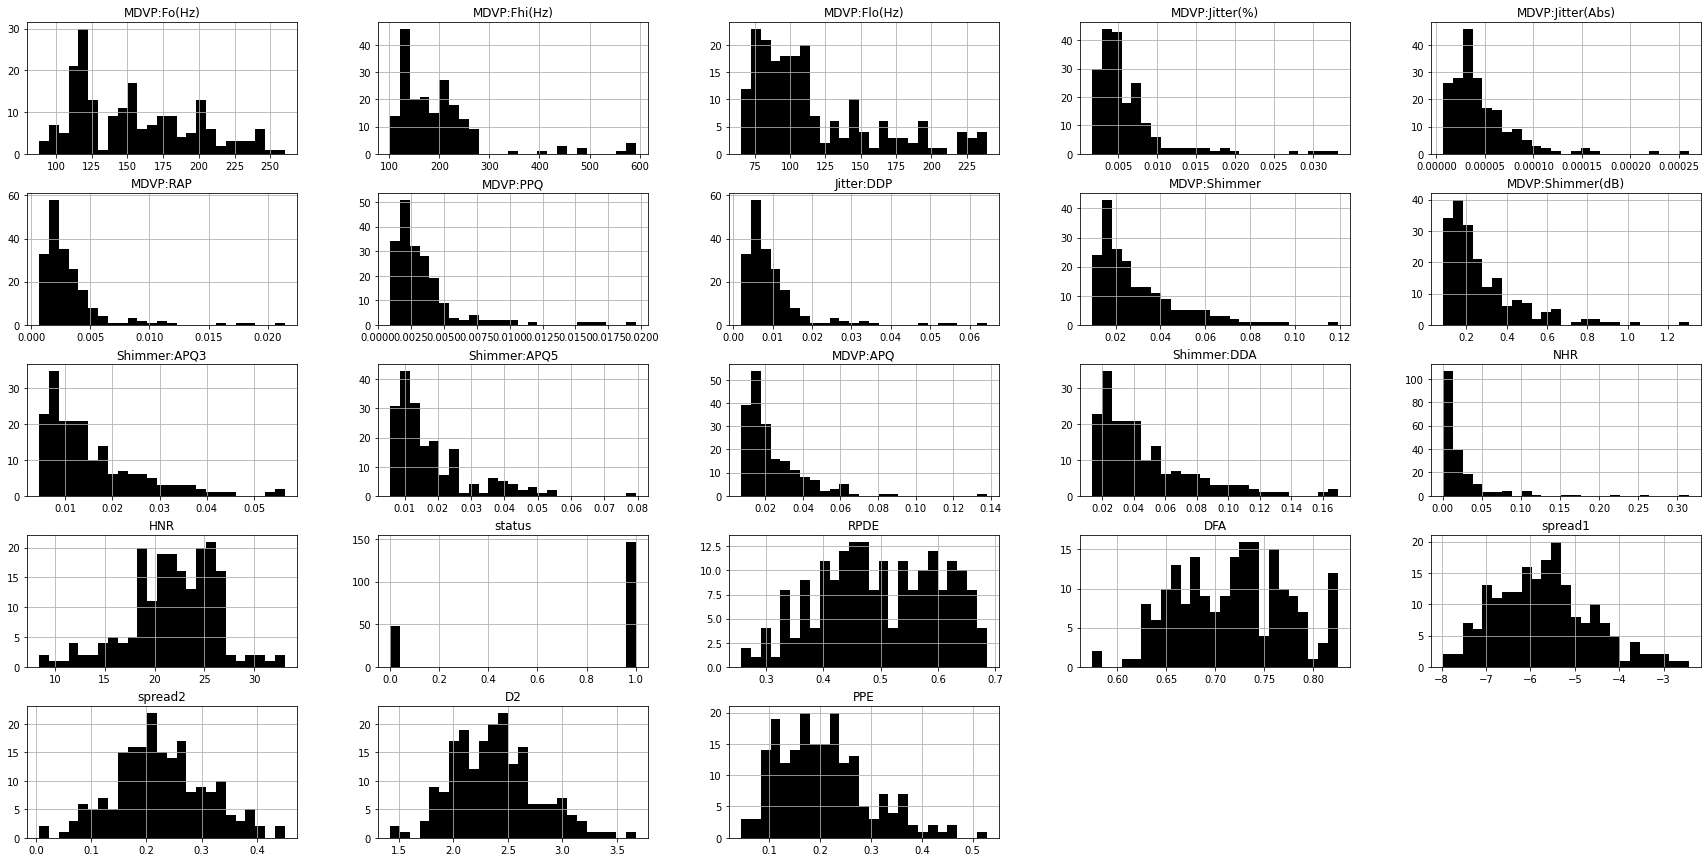

In [29]:
file.hist(bins=25, figsize=(30,15),color='black')
plt.show()

# Correlation to check how the variables are related to each other.

In [30]:
file.corr().style.background_gradient(cmap="bone")


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


# Lineplot for displaying numerical data and visualizing the movement to those Numerical Data.

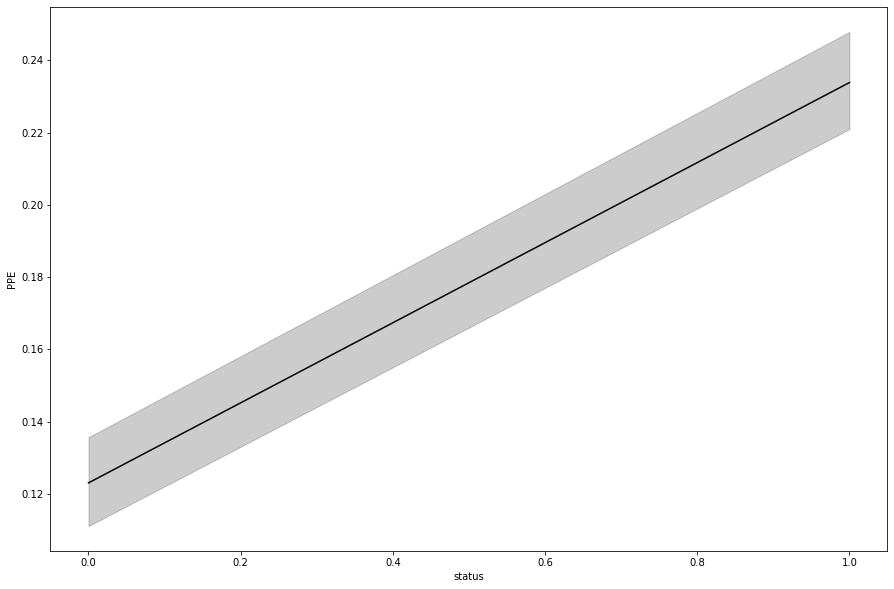

In [31]:
plt.figure(figsize=(15,10))
sns.lineplot(file.status,file.PPE,color='black')

# Heatmap to represent correlation matrix representing the correlation between different variables.

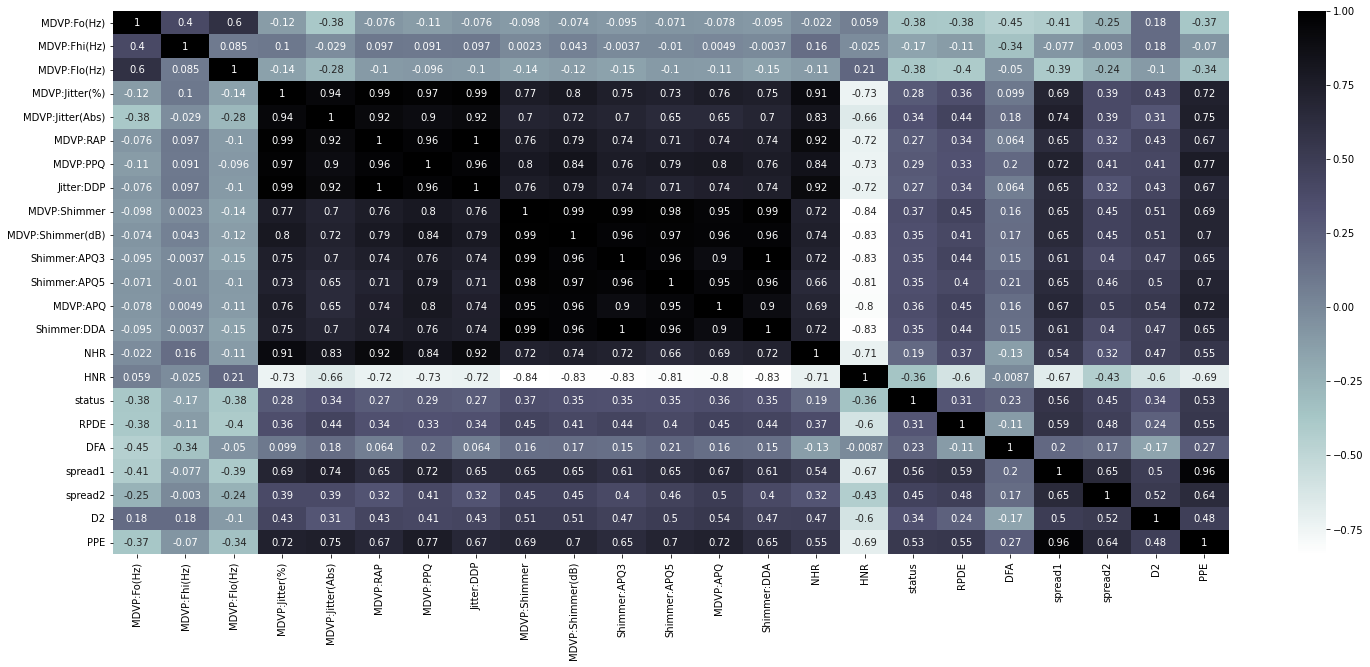

In [32]:
corr=file.corr()
import seaborn as sns
plt.figure(figsize=(25,10))

sns.heatmap(corr,annot=True,cmap='bone_r')

# Countplot to represent the categories

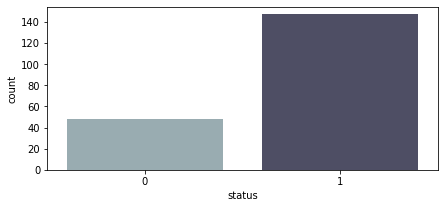

In [33]:
plt.figure(figsize=(7,3))
sns.countplot(file.status,palette='bone_r')

# Finding Correlation for Numerical Features

In [34]:
#checking the numerical features
num_fea = file.dtypes[file.dtypes != "object"].index
print(num_fea)
print(len(num_fea))

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')
23


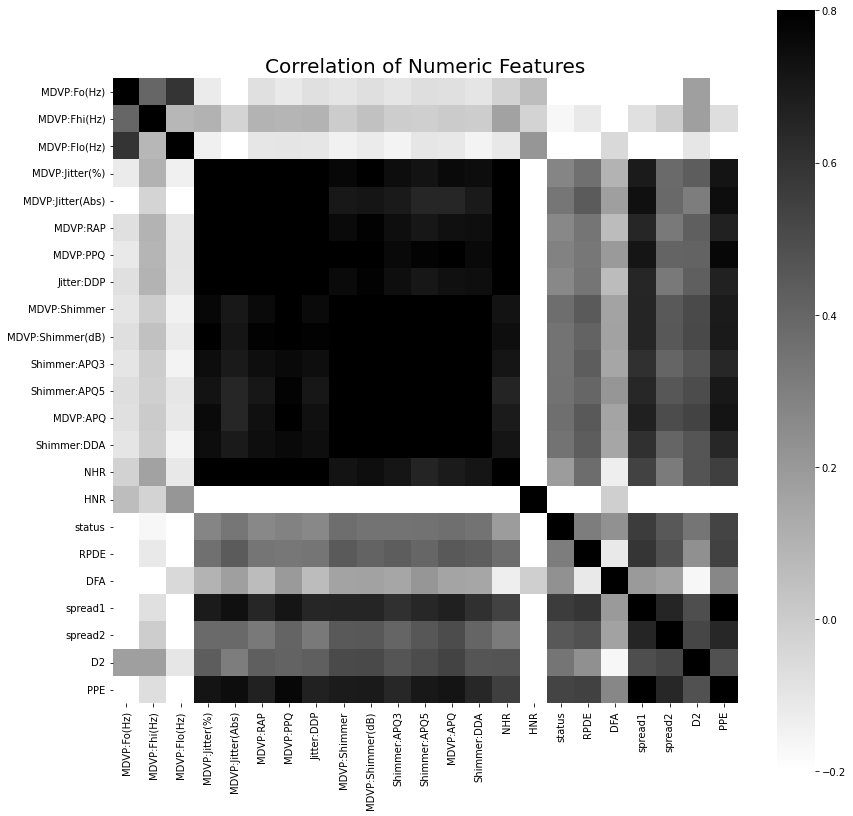

In [35]:
#printing the numerical features
df_num_fea= file.select_dtypes(include=[np.number])
corr= df_num_fea.corr()
corr["status"].sort_values(ascending=False)*100
f, ax= plt.subplots(figsize=(14,14))
plt.title("Correlation of Numeric Features", y=1, size=20)
sns.heatmap(corr, square= True, vmin=-0.2, vmax=0.8, cmap="binary")

# Barchart for making comparisons between different variables and analyzing patterns over long periods of time.



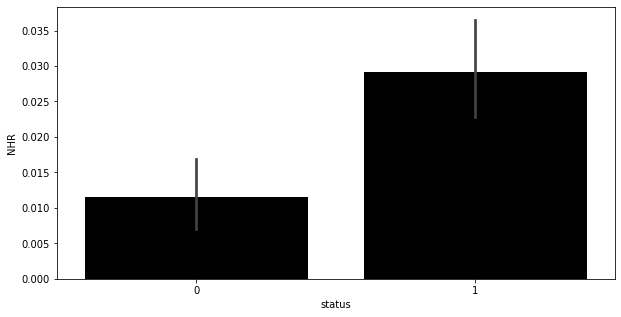

In [36]:

plt.figure(figsize=(10,5))
sns.barplot(file['status'],file['NHR'],color='black')
plt.show()

# Using InterQuartile Range for detecting Outliers

In [37]:
p0=file.spread1.min()
p100=file.spread1.max()

In [38]:
q1=file.spread1.quantile(0.25)
q2=file.spread1.quantile(0.5)
q3=file.spread1.quantile(0.75)


In [39]:
iqr=q3-q1
iqr

1.4039040000000007

In [40]:
lower_cutoff=q1-1.5*iqr
lower_cutoff

-8.555952000000001

In [41]:
upper_cutoff=q3+1.5*iqr
upper_cutoff

-2.9403359999999985

# Checking for Outliers using Boxplot

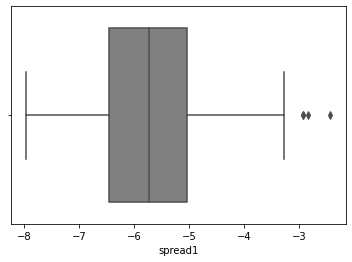

In [42]:
sns.boxplot(file.spread1,color='grey')

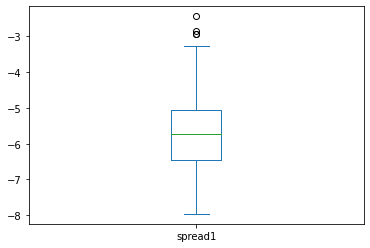

In [43]:
file.spread1.clip(upper=upper_cutoff)
file.spread1.plot(kind='box')

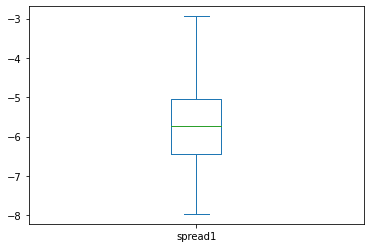

In [44]:
file.spread1.clip(upper=upper_cutoff,inplace=True)
file.spread1.plot(kind='box')

Here we removed Outliers using Inter Quartile Range.

# Before splitting the datas,firstly we have to check whether all datas are in Numerical terms. If there is Categorical Variable,we should convert them into Numerical Terms to get higher results.


Here we use Label Encoder for converting Categorical Value to Numerical Value.

In [45]:
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()
label = model.fit_transform(file['name'])
label

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [46]:
file['name']=label
label

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

# Splitting  the datas into X and Y

In [47]:
x=file.drop(columns='status')
x

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [48]:
y=file.status

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state =  1)


# Using Logistic Regresssion       

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model=LogisticRegression()
#fitting the model
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
ypred=model.predict(x_test)
model.predict_proba(x_test)

In [53]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0])

After training the model, we have to check that the model is trained good or not
For that,we have to calculate with some measures and check whether the model can able to predict the person who has disease or not.

# So here we are going to check the Accuracy Score, Confusion Matrix, f1 score and Classification Report.

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [55]:
accuracy_score(y_test,y_pred)

0.9

In [56]:
confusion_matrix(y_test,y_pred)

array([[ 4,  2],
       [ 1, 23]])

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.92      0.96      0.94        24

    accuracy                           0.90        30
   macro avg       0.86      0.81      0.83        30
weighted avg       0.90      0.90      0.90        30



# Using Decision Tree Classifier

Using Logistic Regression we got less accuracy score of 90%.This method will not suite for this model. So we go for Decision Tree Classifier which can provide better accuracy than the previous method.

In [58]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [59]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
ypred=model.predict(x_test)
model.predict_proba(x_test)


After training the model, we have to check that the model is trained good or not
For that,we have to calculate with some measures and check whether the model can able to predict the person who has disease or not.

# So here we are going to check the Accuracy Score, Confusion Matrix, f1 score and Classification Report to find the better results than the previous algorithm model.

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [62]:
accuracy_score(y_test,ypred)

0.9666666666666667

In [63]:
f1_score(y_test,ypred)

0.9787234042553191

In [64]:
confusion_matrix(y_test,ypred)

array([[ 6,  0],
       [ 1, 23]])

In [65]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.96      0.98        24

    accuracy                           0.97        30
   macro avg       0.93      0.98      0.95        30
weighted avg       0.97      0.97      0.97        30



# Using the Decision Tree Classifier we got the accuracy score of 96%.
## Hence we conclude that the model is good for predicting the person who is affected with Parkinson Disease or not affected using the Statistical Methods and Machine Learning Algorithms with the given measures.

# Final Prediction of the Model

In [66]:
y=model.predict([[90.32,115.47,75.89,0.0048,0.00005,0.00117,0.0099,0.0345,0.8869,
                  0.108,0.01443,0.077,0.04445,0.08765,0.9987,0.0897,15.97,0.8908,0.79686,-6.0897,0.23467,2.10854,0.2022]])

In [67]:
if(y==1):
  print("The Person is affected with Parkinson Disease")
else:
  print("The Person is Healthier")

The Person is affected with Parkinson Disease


# Here we checked how the model works and predicts the person who is affected by the disease and the person who is healthier and this can be predicted in early stage.